# DCA

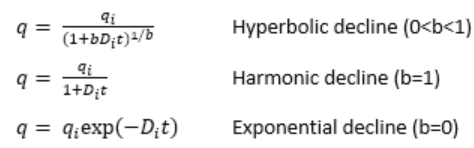

## Ajuste Exponencial

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [130]:
# Datos proporcionados
año = np.array([0, 1, 2, 3, 4, 5, 6, 7])
q = np.array([5000, 4100, 3300, 2600, 2250, 1800, 1525, 1210])
q_log=np.log(q)

df_exp=pd.DataFrame({'Año':año, 'Caudal bopd':q, 'ln(Caudal)':q_log})

df_exp

,Año,Caudal bopd,ln(Caudal)
0,0,5000,8.517193
1,1,4100,8.318742
2,2,3300,8.101678
3,3,2600,7.863267
4,4,2250,7.718685
5,5,1800,7.495542
6,6,1525,7.329750
7,7,1210,7.098376


Realizmaos un grafico de Dispersión para Conocer la data y revisar su comportamiento 

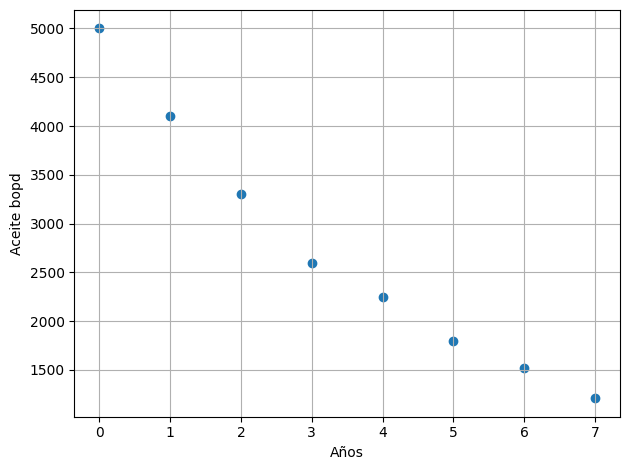

In [131]:
plt.scatter(df_exp['Año'], df_exp['Caudal bopd'])
plt.xlabel('Años')
plt.ylabel('Aceite bopd')
plt.tight_layout()
plt.grid(True)
plt.show()

In [132]:
#Ajustamos la regresión Lineal a Nuestra data
model_lineal=LinearRegression()
model_lineal.fit(año.reshape(-1,1), q)
q_predict=model_lineal.predict(año.reshape(-1,1))
q_predict
df_exp['Caudal bopd Lineal']=q_predict

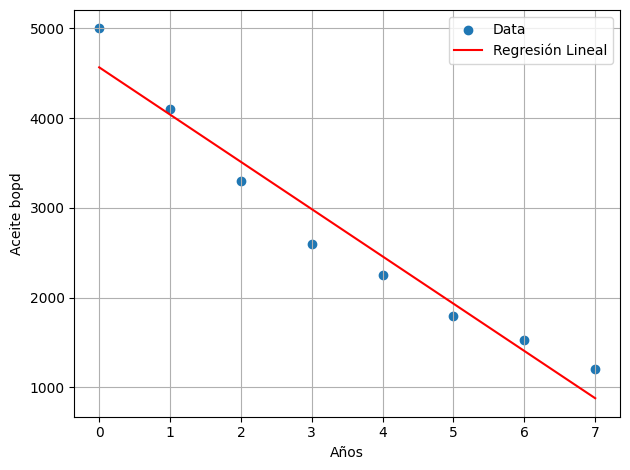

In [133]:
plt.scatter(df_exp['Año'], df_exp['Caudal bopd'], label='Data')
plt.plot(df_exp['Año'], df_exp['Caudal bopd Lineal'], color='red',label= 'Regresión Lineal')
plt.xlabel('Años')
plt.ylabel('Aceite bopd')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

La regresión no se ajusta Bien a nuestros datos 

In [134]:
def func_exp(t,qi,Di):
    return qi*np.exp(Di*t)


params, params_covariance = curve_fit(func_exp, año, q, p0=[5000, -0.1])

# # Predicción usando los parámetros ajustados
q_pred_exp = func_exp(año, params[0], params[1])


In [160]:
def func_exp(x, a, b):
    return a * np.exp(b * x)

a=func_exp(año,5000,0.2)
a
# Ajustar el modelo exponencial a los datos
params, params_covariance = curve_fit(func_exp, año, q)

# # Predicción usando los parámetros ajustados
q_pred_exp = func_exp(año, params[0], params[1])
q_pred_exp


año_exp=np.arange(0,20)

# df_exp['Caudal bopd exponencial']=q_pred_exp

año_extended=np.arange(0,20)
df_año_extended = pd.DataFrame({'Año': año_extended})

# Unir los DataFrames usando una unión externa
df_exp = pd.merge(df_exp, df_año_extended, on='Año', how='outer')


q_pred_exp = func_exp(año_exp, params[0], params[1])
print(f"q={round(params[0],2)}*exp({round(params[1],2)}*t)")
df_exp['Caudal bopd exponencial']=q_pred_exp
df_exp



q=4987.85*exp(-0.2*t)


,Año,Caudal bopd,ln(Caudal),Caudal bopd Lineal,Caudal bopd exponencial
0,0,5000.0,8.517193,4567.083333,4987.847481
1,1,4100.0,8.318742,4040.238095,4069.342522
2,2,3300.0,8.101678,3513.392857,3319.978933
3,3,2600.0,7.863267,2986.547619,2708.609574
4,4,2250.0,7.718685,2459.702381,2209.823006
5,5,1800.0,7.495542,1932.857143,1802.887269
6,6,1525.0,7.329750,1406.011905,1470.888165
7,7,1210.0,7.098376,879.166667,1200.026219
8,8,NaN,NaN,NaN,979.043112
9,9,NaN,NaN,NaN,798.753727


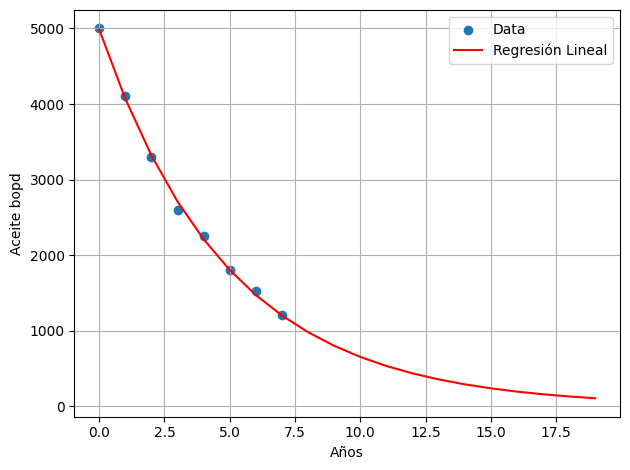

In [151]:
plt.scatter(df_exp['Año'], df_exp['Caudal bopd'], label='Data')
plt.plot(df_exp['Año'], df_exp['Caudal bopd exponencial'], color='red',label= 'Regresión Lineal')
plt.xlabel('Años')
plt.ylabel('Aceite bopd')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

## Ajuste Hiperbòlico

In [191]:
año_nor=año/max(año)
q_norm=q/max(q)
def func_hyper(t,qi,Di,b):
    return qi/(((1+b*Di*t)))**(1/b)

# Proporcionar valores iniciales para los parámetros
initial_params = [5000, 0.1, 0.1]

params, params_covariance=curve_fit(func_hyper,año, q, p0=initial_params)
params

array([5.01675520e+03, 2.14675620e-01, 9.73098257e-02])

In [194]:
df_exp['Caudal bopd Hiperbolica']=func_hyper(df_exp['Año'],params[0], params[1], params[2])

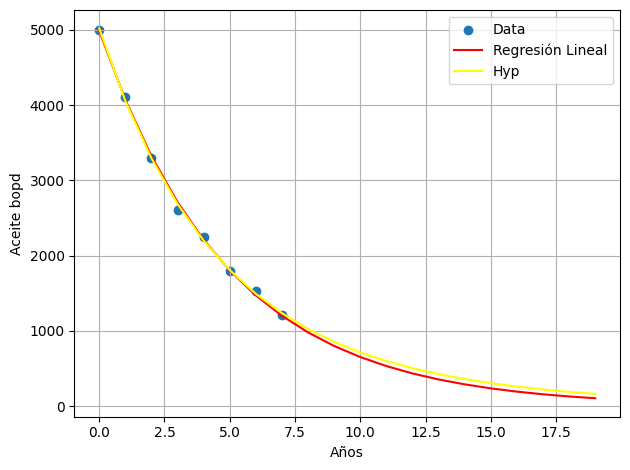

In [190]:
plt.scatter(df_exp['Año'], df_exp['Caudal bopd'], label='Data')
plt.plot(df_exp['Año'], df_exp['Caudal bopd exponencial'], color='red',label= 'Regresión Lineal')
plt.plot(df_exp['Año'], df_exp['Caudal bopd Hiperbolica'], color='yellow',label= 'Hyp')
plt.xlabel('Años')
plt.ylabel('Aceite bopd')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

## Ajuste Armónico

In [211]:
def func_arm(t,qi,Di):
    return qi/(1+Di*t)

initial_params=[5000,0]
params, params_covariance=curve_fit(func_arm,año, q, p0=initial_params)

In [214]:
df_exp['Caudal bopd Armonica']=func_arm(df_exp['Año'],params[0], params[1])

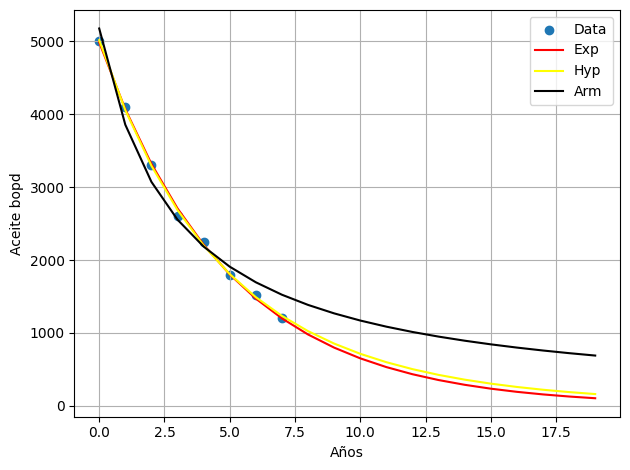

In [215]:
plt.scatter(df_exp['Año'], df_exp['Caudal bopd'], label='Data')
plt.plot(df_exp['Año'], df_exp['Caudal bopd exponencial'], color='red',label= 'Exp')
plt.plot(df_exp['Año'], df_exp['Caudal bopd Hiperbolica'], color='yellow',label= 'Hyp')
plt.plot(df_exp['Año'], df_exp['Caudal bopd Armonica'], color='black',label= 'Arm')
plt.xlabel('Años')
plt.ylabel('Aceite bopd')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()